# Visualize Data with Python
## Gaming habits and psychological well-being

### 1. Importing the data

In [1]:
# Importing the libraries I'll be using
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# And importing our dataset
gaming_study = pd.read_csv('GamingStudy_data.csv', encoding='windows-1252', index_col=0)

# Previewing the first 5 rows
print(gaming_study.head())

# And getting a summary for the columns
gaming_study.info()


    Zeitstempel  GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  \
1  42052.004366     0     0     0     0     1     0     0   
2  42052.006803     1     2     2     2     0     1     0   
3  42052.038599     0     2     2     0     0     3     1   
4  42052.068037     0     0     0     0     0     0     0   
5  42052.089478     2     1     2     2     2     3     2   

                   GADE  SWL1  ...  Birthplace    Residence  Reference  \
1  Not difficult at all     3  ...         USA          USA     Reddit   
2    Somewhat difficult     3  ...         USA          USA     Reddit   
3  Not difficult at all     2  ...     Germany      Germany     Reddit   
4  Not difficult at all     2  ...         USA          USA     Reddit   
5        Very difficult     2  ...         USA  South Korea     Reddit   

                                           Playstyle  accept GAD_T  SWL_T  \
1                                       Singleplayer  Accept     1     23   
2              Multiplayer - onlin

The Dataset is made of a high number of columns, consisting of the following information:
|VARIABLE's	|TYPE	|EXPLANATION|
|---|---|---|
|Zeitstempel	|Excel DateTime	|Time stamp|
|Reference	|string	|Where they know the study from|
|Accept	|string	|Accepted consent form|
|Hours	|int	|Hours played per week|
|streams	|int	|Additionnal hours dealing with the game other than playing|
|Game	|string	|Which game is played the most|
|Platform	|string	|Which platform is used the most|
|earnings	|string	|Earnings related to gaming (multiple choice plus 'Other')|
|whyplay	|string	|Motivation for playing (multiple choice plus 'Other')|
|Playstyle	|string	|Do they play online or offline? (single choice plus 'Other')|
|League	|string	|Which League are they in (game-sppecific ranking, free-text)|
|highestleague	|string	|Which League was their highest ever (game-sppecific ranking, free-text)|
|SPIN_T	|int	|total SPIN score|
|SPIN (1-17)	|int	|individual SPIN item scores|
|GAD_T	|int	|total GAD score|
|GAD (1-7)	|int	|individual GAD item scores|
|GADE|string| GAD score difficulty on daily life|
|SWL_T	|int	|total SWL score|
|SWL (1-5)	|int	|individual SWL item scores|
|Narcissism	|int	|SINS score|
|Birthplace	|int	|Country of birth in English|
|Birthplace_ISO3	|string	|Country of birth in ISO3 format|
|Residence	|string	|Country of residence in English|
|Residence_ISO3	|string	|Country of residence in ISO3 format|
|Age	|int	|Age in years|
|Work	|string	|Occupation status (single choice)|
|Degree	|string	|Highest degree (single choice)|
|Gender	|string	|Gender (single choice)|

### 2. Cleaning the Data

For our data analysis, the data types make sense for the data stored in the columns, the exception being columns that were expected to be `int`, but because there's values missing it shows up as `float`. There's a high number of columns, but there's some that are not needed, such as the individual scores used to calculate the SPIN, GAD and SWL Total scores. There is also an empty column `highestleague`, that we also can drop. Brithplace countries and Residence countries are also repeated columns, appearing again as their ISO3 codes. For ease of reading, I'll drop the ISO3 columns. The `Zeitstempel` column, that collects the timestamp the survey was submitted, and the `accept` column where it's stored if the person accepted the consent is also unnecessary.

While there are other columns that have missing values, I don't think the missing values are high number enough to invalidate the data in those columns.

Dropping the unnecessary columns:

In [2]:
gaming_study = gaming_study.drop(columns = ['Zeitstempel', 'accept', 'highestleague', \
                            'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', \
                            'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', \
                            'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5',\
                            'Birthplace_ISO3', 'Residence_ISO3'])

From the data analysis, there are also some columns that I think should be renamed so we can better understand the data in them:

|Original|New Name|
|---|---|
|Hours|Hours_week|
|streams|Additional_hours|
|Birthplace|Birth_country|
|Residence|Residence_country|
|Work|Occupation|
|Degree|Education|
|whyplay|Motivation|
|earnings|Earnings|
|Narcissism|SINS_T|

In [3]:
gaming_study.rename(columns={'Hours': 'Hours_week', 'streams': 'Additional_hours', 'Birthplace': 'Birth_country', 'Residence': 'Residence_country', \
                  'Work': 'Occupation', 'Degree': 'Education', 'whyplay': 'Motivation', 'earnings': 'Earnings', 'Narcissism': 'SINS_T'}, inplace=True)

Let's investigate our updated DataFrame so we can get some more information:

In [4]:
print(gaming_study.info())
print(gaming_study.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 13464 entries, 1 to 14250
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GADE               12815 non-null  object 
 1   Game               13464 non-null  object 
 2   Platform           13464 non-null  object 
 3   Hours_week         13434 non-null  float64
 4   Earnings           13464 non-null  object 
 5   Motivation         13464 non-null  object 
 6   League             11612 non-null  object 
 7   Additional_hours   13364 non-null  float64
 8   SINS_T             13441 non-null  float64
 9   Gender             13464 non-null  object 
 10  Age                13464 non-null  int64  
 11  Occupation         13426 non-null  object 
 12  Education          11887 non-null  object 
 13  Birth_country      13464 non-null  object 
 14  Residence_country  13464 non-null  object 
 15  Reference          13449 non-null  object 
 16  Playstyle          13464 no

By analysing the descriptive summaries of the columns, it can be noted that there's high standart deviation for the `Hours_week` and `Additional_hours` columns, which indicates the likelyhood of outliers, also, the maximum values for those two columns are '8000' and '9000', which are clearly impossible, so I'll check the 5 maximum hours played:

In [5]:
max_hours= gaming_study.sort_values(by='Hours_week', ascending=False).iloc[:10]
print(max_hours['Hours_week'])

4046     8000.0
9944      420.0
9439      160.0
14056     150.0
3267      140.0
8024      140.0
4575      120.0
9247      120.0
653       120.0
4268      120.0
Name: Hours_week, dtype: float64


From analysing this piece of information, I can see that there are some unrealistic values, as a week has 168 hours, some values are clearly impossible, sucha as gaming 8000, 420, or even 160 hours a week, as examples. Upon some investigating, I found information from studies that indicate most harcore gamers play up to 50 hours a week, with maximum at 80 (Consumer Technology Association (U.S., 2022) = 37 hours/week, Niko Partners (China) = 42 hours/week,NPD / TechSpot (U.S.) = 48.5 hours/week).
Even though this information is clearly impossible, I decided to keep those values in the database, to check if there is any correlations between those values and the wellbeing scores.

I'll now check the values in the columns `Motivation` and `League`:

In [6]:
print(gaming_study.Motivation.value_counts(), '\n')
print(gaming_study.League.value_counts())

Motivation
having fun                                   5289
improving                                    4927
winning                                      2091
relaxing                                      654
All of the above                               26
                                             ... 
winning, improving AND having fun               1
talking to irl friends                          1
Forgetting about my drug addiction              1
Having fun and improving at the same time       1
Ranked = winning Normals = Fun                  1
Name: count, Length: 407, dtype: int64 

League
Gold                                             970
Silver                                           650
Platinum                                         635
Diamond                                          549
gold                                             316
                                                ... 
euw                                                1
Gold 3, but this sea

For the sake of consistency, I'm changing the values on those two columns to Tile case, and checking the values again:

In [7]:
gaming_study['Motivation'] = gaming_study['Motivation'].str.title()
gaming_study['League'] = gaming_study['League'].str.title()

print(gaming_study.Motivation.value_counts(), '\n')
print(gaming_study.League.value_counts())

Motivation
Having Fun                                   5289
Improving                                    4927
Winning                                      2091
Relaxing                                      654
All Of The Above                               49
                                             ... 
Forgetting About My Drug Addiction              1
Having Fun And Improving At The Same Time       1
Winning And Improving.                          1
Escaping Reality                                1
Winning And Improving At The Same Time          1
Name: count, Length: 377, dtype: int64 

League
Gold                            1292
Silver                           866
Platinum                         803
Diamond                          701
Unranked                         383
                                ... 
Unranked Currently.                1
I Don'T Know What That Means       1
Bad                                1
Diamond/Master                     1
Pplatinum            

Here, we can see the number of unique values for the `Motivation` and the `League` decreased, meaning that there were some identical answers that only differed on the casing of the font used. There are still a lot of unique values on both columns, with `Motivation` totalling 377 different answers and `League` totaling 1259.

From analysing the DataFrame, it's also possible to see that two columns that should not have `NULL` values on them actually have a few:

**`Occupation`** - 38 `NULL` values - this might be due to errors when collecting the data, but is only 0.28% of the overall data, so we can substitue those values for "Unemployed / between jobs" that was one of the valid answers of the survey, without skewing our data too much.

**`Education`** - 1577 `NULL` values, while some might be due to errors in collecting the data, the most should be from selecting the option "None" on the survey, so we can change those values on the DataFrame for the string "None".

Bellow are shown the unique values of both columns:

In [8]:
print ('Before changing NULL:')
print(gaming_study.Occupation.info(), '\n')
print(gaming_study.Education.info(),'\n')
print(gaming_study.Occupation.value_counts(), '\n')
print(gaming_study.Education.value_counts(), '\n')

gaming_study = gaming_study.fillna({'Occupation': 'Unemployed / between jobs','Education': 'None'})

print ('After changing NULL:')
print(gaming_study.Occupation.info(), '\n')
print(gaming_study.Education.info(),'\n')
print(gaming_study.Occupation.value_counts(), '\n')
print(gaming_study.Education.value_counts())


Before changing NULL:
<class 'pandas.core.series.Series'>
Index: 13464 entries, 1 to 14250
Series name: Occupation
Non-Null Count  Dtype 
--------------  ----- 
13426 non-null  object
dtypes: object(1)
memory usage: 210.4+ KB
None 

<class 'pandas.core.series.Series'>
Index: 13464 entries, 1 to 14250
Series name: Education
Non-Null Count  Dtype 
--------------  ----- 
11887 non-null  object
dtypes: object(1)
memory usage: 210.4+ KB
None 

Occupation
Student at college / university    7073
Employed                           2734
Student at school                  2229
Unemployed / between jobs          1390
Name: count, dtype: int64 

Education
High school diploma (or equivalent)    8560
Bachelor (or equivalent)               2687
Master (or equivalent)                  546
Ph.D., Psy. D., MD (or equivalent)       94
Name: count, dtype: int64 

After changing NULL:
<class 'pandas.core.series.Series'>
Index: 13464 entries, 1 to 14250
Series name: Occupation
Non-Null Count  Dtype 
-------

### 3. Creating Visualizations
Now that the DataFrame is ready and clean, we can proceed with creating visualisations.

I decided to split my visualisations into four different parts, each intending to answer a specific set of questions:

##### 1. Demographic data:
1. Gender disparity in gaming
2. Education in gaming
3. Occupation in gaming

##### 2. Basis data:
1. Platform used
2. Online vs. Offline play
3. Players with earnings

##### 3. Score analysis:
1. Scores
   1. General scores
   2. by age
   3. by gender
   4. by education
   5. by country of residence
   6. Online vs. Offline

##### 4. Hours played analysis:
1. Hours played:
   1. Under 50:
       1. Education
       2. Scores
   2. Over 50:
       1. Education
       2. Scores
2. Hours played and additional hours:
   1. Under 50:
       1. Education
       2. Scores
   2. Over 50:
      1. Education
      2. Scores

#### 3.1 Demographic Data
##### 3.1.1 Gender Disparity in gaming

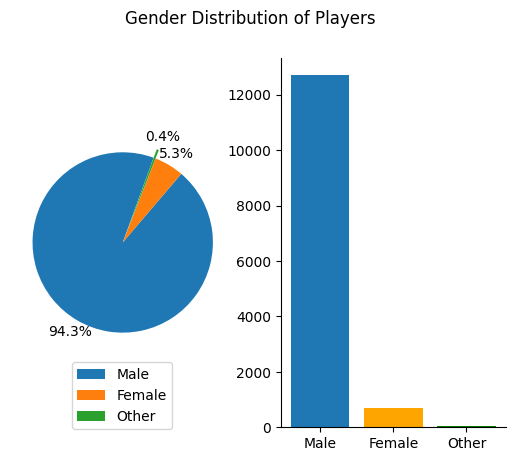

In [35]:
# Calculating the number of rows for each value of Gender
gender_counts = gaming_study.Gender.value_counts()

# Creating subplot on right
plt.subplot(1,2,1)

plt.suptitle("Gender Distribution of Players")

# Plot pie chart
plt.pie(x = gender_counts, labels= None, # removes the labels from the outside of the pie chard, as we have a legend
        autopct='%1.1f%%', # shows percentages
        startangle=70, # rotates so first slice starts at 12 o’clock
        explode = [0, 0, 0.1], # pulls a slice out so it's more visible
        pctdistance= 1.15) # puts percentages outside the pie chart 

plt.legend(bbox_to_anchor = (0.75,0), labels =gender_counts.index)

# Creating subplot on left
plt.subplot(1,2,2)

# Plot bar chart
plt.bar(x = gender_counts.index, height = gender_counts, color = ['#1f77b4', 'orange', 'green'])
plt.gca().spines[['right', 'top']].set_visible(False) # gca = Get Current Axis = to turn the top and right spine off

plt.show()

##### 3.1.2 Education in gaming

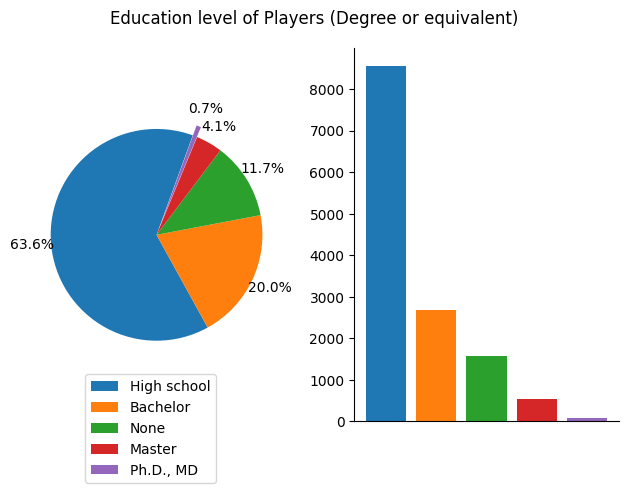

In [46]:
# Calculating the number of rows for each value of Education
education_counts = gaming_study.Education.value_counts()

# Creating subplot on right
plt.subplot(1,2,1)

plt.suptitle("Education level of Players (Degree or equivalent)")

# Plot pie chart
plt.pie(x = education_counts, labels= None, # removes the labels from the outside of the pie chart, as we have a legend
        autopct='%1.1f%%', # shows percentages
        startangle=70, # rotates so first slice starts at 12 o’clock
        explode = [0, 0, 0, 0, 0.1], # pulls a slice out so it's more visible
        pctdistance= 1.18) # puts percentages outside the pie chart 

plt.legend(bbox_to_anchor = (0.75,0), labels =['High school', 'Bachelor', 'None', 'Master', 'Ph.D., MD'])

# Creating subplot on left
plt.subplot(1,2,2)

# Plot bar chart
plt.bar(x = education_counts.index, height = education_counts, color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

plt.tick_params(axis='x', bottom=False, labelbottom=False) # ticks and labels along the bottom edge are off
plt.gca().spines[['right', 'top']].set_visible(False) # Spines are turned off

plt.tight_layout() # so that the figures don't go over each other

plt.show()

##### 3.1.3 Education in gaming

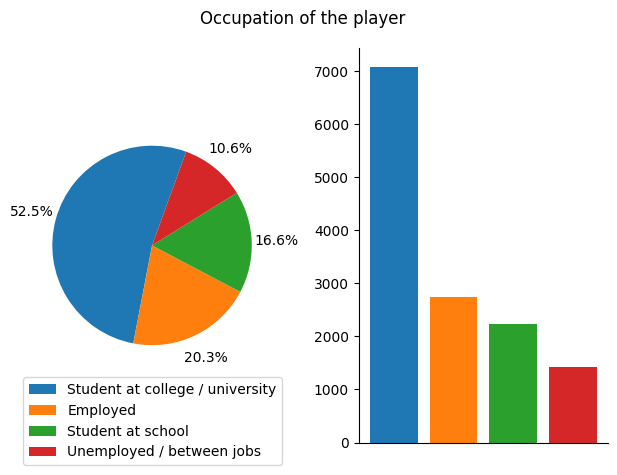

In [51]:
# Calculating the number of rows for each value of Occupation
occupation_counts = gaming_study.Occupation.value_counts()

# Creating subplot on right
plt.subplot(1,2,1)

plt.suptitle("Occupation of the player")

# Plot pie chart
plt.pie(x = occupation_counts, labels= None, # removes the labels from the outside of the pie chart, as we have a legend
        autopct='%1.1f%%', # shows percentages
        startangle=70, # rotates so first slice starts at 12 o’clock
        pctdistance= 1.25) # puts percentages outside the pie chart 

plt.legend(bbox_to_anchor = (1.05,0), labels =occupation_counts.index)

# Creating subplot on left
plt.subplot(1,2,2)

# Plot bar chart
plt.bar(x = occupation_counts.index, height = occupation_counts, color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.tick_params(axis='x', bottom=False, labelbottom=False) # ticks and labels along the bottom edge are off
plt.gca().spines[['right', 'top']].set_visible(False) # Spines are turned off

plt.tight_layout() # so that the figures don't go over each other

plt.show()

#### 3.2 Basic Data
##### 3.2.1 Platform used

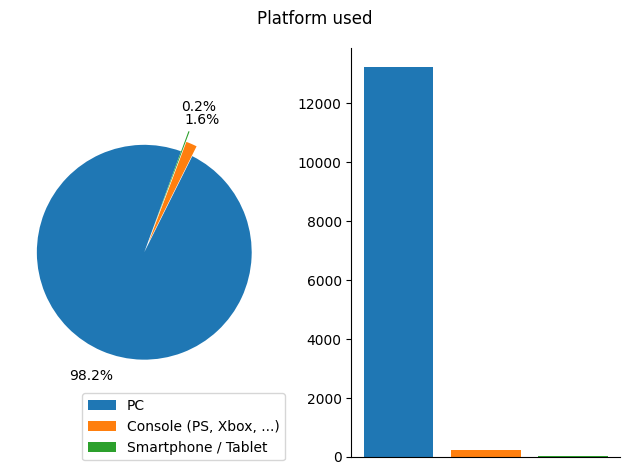

In [57]:
# Calculating the number of rows for each Platform
platform_counts = gaming_study.Platform.value_counts()

# Creating subplot on right
plt.subplot(1,2,1)

plt.suptitle("Platform used")

# Plot pie chart
plt.pie(x = platform_counts, labels= None, # removes the labels from the outside of the pie chart, as we have a legend
        autopct='%1.1f%%', # shows percentages
        startangle=70, # rotates so first slice starts at 12 o’clock
        pctdistance= 1.25, # puts percentages outside the pie chart 
        explode = [0, 0.1, 0.2]) # pulls two slices out so the bar chart is more visible

plt.legend(bbox_to_anchor = (1.05,0), labels =platform_counts.index)

# Creating subplot on left
plt.subplot(1,2,2)

# Plot bar chart
plt.bar(x = platform_counts.index, height = platform_counts, color = ['#1f77b4', '#ff7f0e', '#2ca02c'])

plt.tick_params(axis='x', bottom=False, labelbottom=False) # ticks and labels along the bottom edge are off
plt.gca().spines[['right', 'top']].set_visible(False) # Spines are turned off

plt.tight_layout() # so that the figures don't go over each other

plt.show()